In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV

In [2]:
df = pd.read_csv('df_scrapy.csv')
df = df.drop(columns='Unnamed: 0')

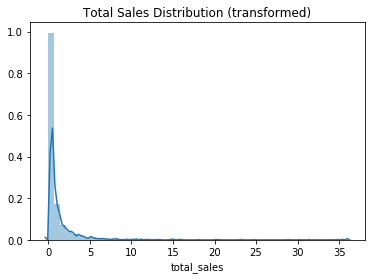

In [3]:
sns.distplot(df['total_sales'])
sns.set_style("whitegrid")
plt.title('Total Sales Distribution (transformed)')
plt.savefig("target_dist_1st.png") 

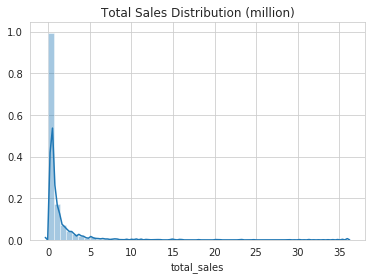

In [4]:
sns.distplot(df['total_sales']);
sns.set_style("whitegrid")
plt.title('Total Sales Distribution (million)')
plt.savefig("notlogtarget_dist_1st.png") 

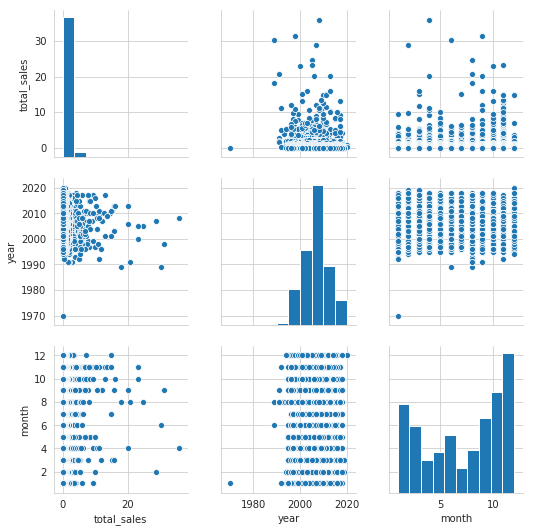

In [5]:
# analyze features
features1 = df.drop(columns='time_delta')
features = list(features1.describe().columns)
sns.pairplot(data=df, vars=features)

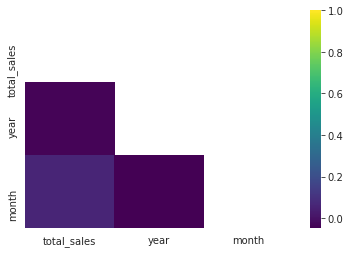

In [6]:
mask = np.triu(np.array(np.ones(df[features].corr().shape)))
#plot a hitmap
sns.heatmap(df[features].corr(), cmap='viridis', mask=mask)

In [7]:
df['genre'].unique()

array(['Role-Playing', 'Action', 'Platform', 'Sports', 'Simulation',
       'Adventure', 'Puzzle', 'Racing', 'Shooter', 'Fighting', 'Strategy',
       'Misc', 'Music', 'Action-Adventure', 'Visual Novel', 'Party'],
      dtype=object)

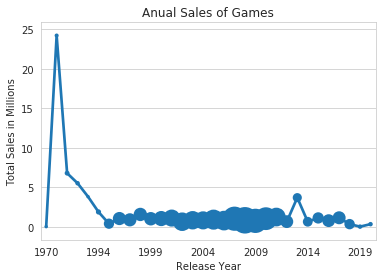

In [9]:
# Look at how time makes a difference ...
count_years = list(df.groupby(['year'])['total_sales'].count())
year_sales = sns.pointplot('year', 'total_sales', data=df, ci=False)
points = year_sales.collections[0]
points.set_sizes([2*x for x in count_years])

for i, label in enumerate(year_sales.get_xticklabels()):
    if i % 5 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
        
plt.title('Anual Sales of Games')
plt.ylabel('Total Sales in Millions')
plt.xlabel('Release Year')
plt.savefig("salesyear2_1st.png")

In [10]:
df.head(5)

,genre,name,platform,ratings,release_date,total_sales,time_delta,year,month
0,Role-Playing,Pokémon Heart Gold / Soul Silver Version,DS,E,2010-03-14,11.78,3137,2010,3
1,Action,Saints Row 2,X360,M,2008-10-14,3.07,3653,2008,10
2,Platform,Ratchet & Clank: Up Your Arsenal,PS2,T,2004-11-03,2.57,5094,2004,11
3,Action,Dynasty Warriors 4,PS2,T,2003-03-25,2.11,5683,2003,3
4,Sports,Tony Hawk's Pro Skater,N64,E,2000-02-29,2.11,6803,2000,2


In [11]:
df.sort_values('total_sales', ascending=False).head(2)

,genre,name,platform,ratings,release_date,total_sales,time_delta,year,month
131,Racing,Mario Kart Wii,Wii,E,2008-04-27,35.90,3823,2008,4
135,Role-Playing,Pokémon Red / Green / Blue Version,GB,E,1998-09-30,31.37,7320,1998,9


In [12]:
# Transform categorical features into values
gm = pd.get_dummies(df[['genre','platform','ratings','time_delta']]) #can just apply it to the whole df
gm['target'] = df['total_sales']
# gm['time_delta'] = df['time_delta']

In [13]:
gm.describe()

,time_delta,genre_Action,genre_Action-Adventure,genre_Adventure,genre_Fighting,genre_Misc,genre_Music,genre_Party,genre_Platform,genre_Puzzle,...,platform_WiiU,platform_X360,platform_XB,platform_XOne,ratings_E,ratings_E10,ratings_M,ratings_RP,ratings_T,target
count,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,...,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000
mean,4356.263630,0.143391,0.007095,0.065721,0.069828,0.062360,0.002987,0.000747,0.075803,0.047050,...,0.006721,0.087379,0.029126,0.008215,0.441001,0.103809,0.141897,0.001867,0.299851,0.986804
std,1931.802287,0.350536,0.083947,0.247839,0.254905,0.241853,0.054585,0.027323,0.264732,0.211785,...,0.081724,0.282442,0.168192,0.090281,0.496600,0.305069,0.349010,0.043177,0.458278,2.342384
min,-808.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3216.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
50%,4053.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000
75%,5667.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.860000
max,17819.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.900000


In [14]:
gm.corr()

,time_delta,genre_Action,genre_Action-Adventure,genre_Adventure,genre_Fighting,genre_Misc,genre_Music,genre_Party,genre_Platform,genre_Puzzle,...,platform_WiiU,platform_X360,platform_XB,platform_XOne,ratings_E,ratings_E10,ratings_M,ratings_RP,ratings_T,target
time_delta,1.000000,-0.094528,-0.134265,-0.035635,0.093665,-0.026928,-0.070540,-0.009905,0.119742,0.024544,...,-0.120178,-0.173031,0.091258,-0.163604,0.287982,-0.207102,-0.185963,-0.093638,0.009414,0.035999
genre_Action,-0.094528,1.000000,-0.034585,-0.108513,-0.112099,-0.105512,-0.022395,-0.011185,-0.117173,-0.090910,...,0.044583,0.065826,0.017839,0.009979,-0.247519,-0.010000,0.285527,-0.017695,0.064778,0.015253
genre_Action-Adventure,-0.134265,-0.034585,1.000000,-0.022420,-0.023161,-0.021800,-0.004627,-0.002311,-0.024209,-0.018783,...,0.047496,-0.026156,-0.014641,0.189462,-0.066121,0.044162,0.080375,-0.003656,-0.016479,0.002509
genre_Adventure,-0.035635,-0.108513,-0.022420,1.000000,-0.072669,-0.068399,-0.014518,-0.007251,-0.075958,-0.058933,...,-0.021818,-0.028703,-0.028015,-0.007444,-0.056502,0.053011,0.064892,-0.011471,-0.025567,-0.022822
genre_Fighting,0.093665,-0.112099,-0.023161,-0.072669,1.000000,-0.070659,-0.014998,-0.007490,-0.078468,-0.060881,...,-0.022539,0.013802,0.030961,-0.024936,-0.219751,-0.078839,-0.094621,-0.011850,0.364313,-0.031821
genre_Misc,-0.026928,-0.105512,-0.021800,-0.068399,-0.070659,1.000000,-0.014116,-0.007050,-0.073858,-0.057303,...,0.054384,-0.014176,-0.035485,0.027853,0.109956,0.033739,-0.073892,-0.011154,-0.081141,0.021228
genre_Music,-0.070540,-0.022395,-0.004627,-0.014518,-0.014998,-0.014116,1.000000,-0.001496,-0.015677,-0.012163,...,-0.004503,0.007292,-0.009481,-0.004982,0.020285,-0.018630,-0.022259,-0.002367,0.008978,0.011002
genre_Party,-0.009905,-0.011185,-0.002311,-0.007251,-0.007490,-0.007050,-0.001496,1.000000,-0.007829,-0.006075,...,-0.002249,-0.008459,-0.004735,-0.002488,-0.024282,0.035511,-0.011117,-0.001182,-0.017891,-0.010469
genre_Platform,0.119742,-0.117173,-0.024209,-0.075958,-0.078468,-0.073858,-0.015677,-0.007829,1.000000,-0.063636,...,0.028240,-0.068633,-0.024436,-0.026065,0.163317,0.050541,-0.116460,-0.012386,-0.122761,0.059438
genre_Puzzle,0.024544,-0.090910,-0.018783,-0.058933,-0.060881,-0.057303,-0.012163,-0.006075,-0.063636,1.000000,...,-0.018278,-0.068755,-0.007025,-0.020223,0.207546,-0.035152,-0.085303,-0.009610,-0.137715,-0.044139


In [15]:
X = gm.drop(columns='target')
y = gm['target']

In [16]:
from sklearn.model_selection import train_test_split
# hold out 20% of the data for final testing
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.2, 
                                        random_state=42)
# divide the data again, train and test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, 
                                        random_state=42)

In [17]:
#Linear
from sklearn.linear_model import LinearRegression

# create a regression object
lm = LinearRegression()
# train the model using the training sets
lm_fit = lm.fit(X_train,y_train)

# R2/score
train_score_linear = lm.score(X_train,y_train)
test_score_linear = lm.score(X_test,y_test)
train_score_linear, test_score_linear

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


(0.0827756186887747, 0.09107403944421556)

In [18]:
#Polynomial

poly = PolynomialFeatures()

lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_train), y_train)
y_pred = lm_poly.predict(poly.transform(X_test))
print("Polynomial Regression:", r2_score(y_test, y_pred))

Polynomial Regression: -5.9597023341629064e+16


In [19]:
# dividing non-test dataset into 5 and testing automatically
reg = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
train_score_lasso = reg.score(X_train, y_train)
test_score_lasso = reg.score(X_test, y_test)
lassocv_alpha = reg.alpha_
train_score_lasso, test_score_lasso

(0.0, -0.0004216519684547837)

In [20]:
#Ridge
lm_ridge = RidgeCV(cv=5)
ridge_fit = lm_ridge.fit(X_train, y_train)
train_score_ridge = ridge_fit.score(X_train, y_train)
test_score_ridge = ridge_fit.score(X_test, y_test)
train_score_ridge, test_score_ridge

(0.07743588045428795, 0.09031673594600798)

Text(0, 0.5, 'Predicted Sales Volume')

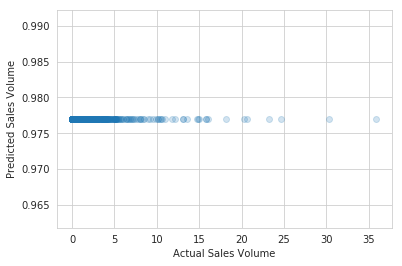

In [21]:
test_score_linear = lm.score(X_holdout,y_holdout)
y_train_pred = reg.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.xlabel('Actual Sales Volume')
plt.ylabel('Predicted Sales Volume')
# plt.plot([0, 400], [0, 400])